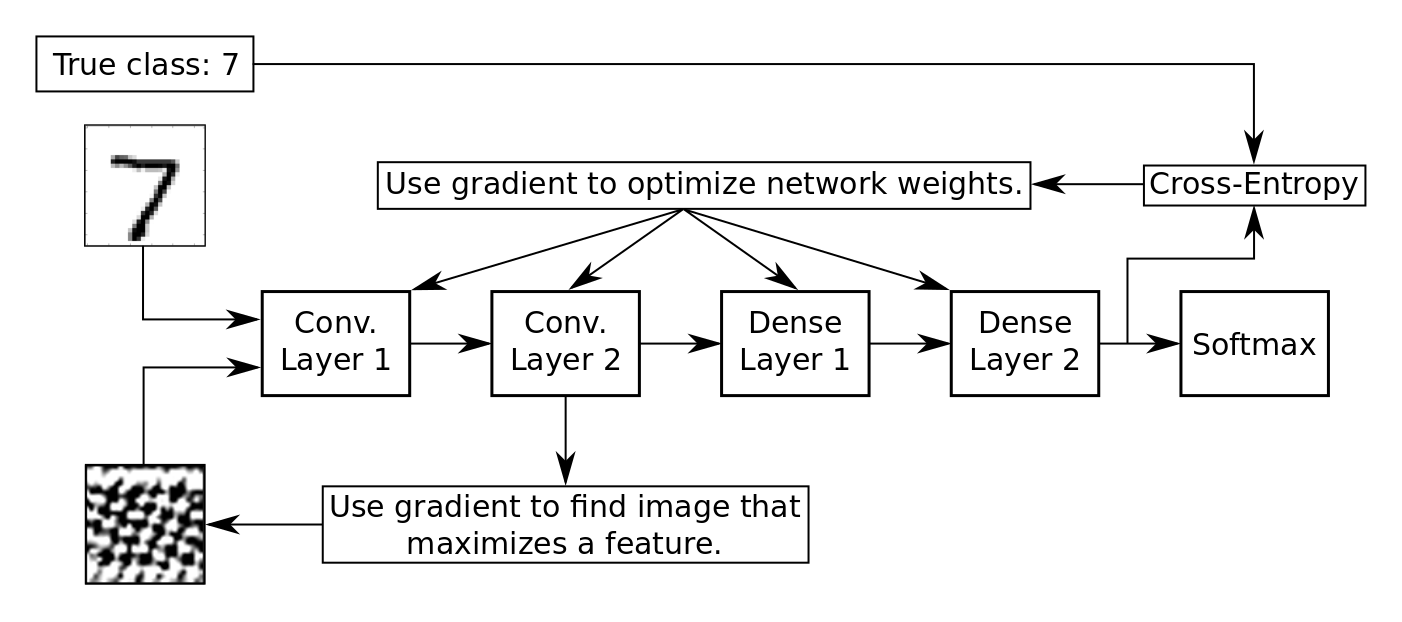

In [1]:
from IPython.display import Image, display
Image('D:\\jupyter\\tensorflow_tutorial\images\\13b_visual_analysis_flowchart.png')

### Imports

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import math

c:\deeplearning\python3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Load data

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('D:\jupyter\\tensorflow_tutorial\\data\MNIST', one_hot=True)

Extracting D:\jupyter\tensorflow_tutorial\data\MNIST\train-images-idx3-ubyte.gz
Extracting D:\jupyter\tensorflow_tutorial\data\MNIST\train-labels-idx1-ubyte.gz
Extracting D:\jupyter\tensorflow_tutorial\data\MNIST\t10k-images-idx3-ubyte.gz
Extracting D:\jupyter\tensorflow_tutorial\data\MNIST\t10k-labels-idx1-ubyte.gz


In [4]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [5]:
data.test.cls = np.argmax(data.test.labels, axis=1)
data.test.cls

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

### Data dimensions

In [6]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 10

### Helper-functions for plotting images

In [7]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [8]:
#Function used to plot 10 images in a 2x5 grid.
def plot_images10(images, smooth=True):
    # Interpolation type.
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'

    # Create figure with sub-plots.
    fig, axes = plt.subplots(2, 5)

    # Adjust vertical spacing.
    fig.subplots_adjust(hspace=0.1, wspace=0.1)

    # For each entry in the grid.
    for i, ax in enumerate(axes.flat):
        # Get the i'th image and only use the desired pixels.
        img = images[i, :, :]
        
        # Plot the image.
        ax.imshow(img, interpolation=interpolation, cmap='binary')

        # Remove ticks.
        ax.set_xticks([])
        ax.set_yticks([])

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()    

In [9]:
#Function used to plot a single image.
def plot_image(image):
    plt.imshow(image, interpolation='nearest', cmap='binary')
    plt.xticks([])
    plt.yticks([])

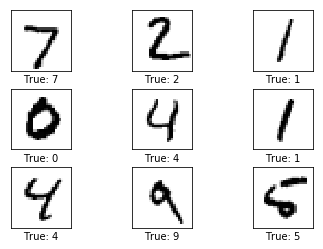

In [10]:
# Get the first images from the test-set.
images = data.test.images[0:9]

# Get the true classes for those images.
cls_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

## Tensorflow Graph 
##### Placeholder variables

In [11]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')

In [12]:
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])

In [13]:
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

In [14]:
y_true_cls = tf.argmax(y_true, axis=1)

##### Neural network

In [15]:
net = x_image

In [16]:
net = tf.layers.conv2d(inputs=net, name='layer_conv1', padding='same',
                       filters=16, kernel_size=5, activation=tf.nn.relu)

In [17]:
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

In [18]:
net = tf.layers.conv2d(inputs=net, name='layer_conv2', padding='same',
                      filters=36, kernel_size=5, activation=tf.nn.relu)

In [19]:
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

In [20]:
net = tf.contrib.layers.flatten(net)

In [21]:
net = tf.layers.dense(inputs=net, name='layer_fc1',
                     units=128, activation=tf.nn.relu)

In [22]:
net = tf.layers.dense(inputs=net, name='layer_fc_out', units=num_classes, activation=tf.nn.relu)

In [23]:
logits = net

In [24]:
y_pred = tf.nn.softmax(logits=logits)

In [25]:
y_pred_cls = tf.argmax(y_pred, axis=1)

##### Loss-Function to be Optimized

In [26]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=logits)

In [27]:
loss = tf.reduce_mean(cross_entropy)

##### Optimization method

In [28]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(loss)

##### Classification Accuracy

In [29]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [30]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Optimize the neural network
##### Create Tensorflow session

In [31]:
session = tf.Session()

##### Initialize variables

In [32]:
session.run(tf.global_variables_initializer())

## Helper-function to perform optimization iterations

In [33]:
train_batch_size = 64

In [34]:
# Counter for total number of iterations performed so far.
total_iterations = 0

def optimize(num_iterations):
    # Ensure we update the global variable rather than a local copy.
    global total_iterations

    for i in range(total_iterations,
                   total_iterations + num_iterations):

        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(train_batch_size)

        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

        # Print status every 100 iterations.
        if i % 100 == 0:
            # Calculate the accuracy on the training-set.
            acc = session.run(accuracy, feed_dict=feed_dict_train)

            # Message for printing.
            msg = "Optimization Iteration: {0:>6}, Training Accuracy: {1:>6.1%}"

            # Print it.
            print(msg.format(i + 1, acc))

    # Update the total number of iterations performed.
    total_iterations += num_iterations

##### Helper-function to plot example errors

In [35]:
def plot_example_errors(cls_pred, correct):
    # This function is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

##### Helper-function to plot confusion matrix

In [36]:
def plot_confusion_matrix(cls_pred):
    # This is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the true classifications for the test-set.
    cls_true = data.test.cls
    
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.matshow(cm)

    # Make various adjustments to the plot.
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

### Helper-function for showing the performance


In [37]:
# Split the test-set into smaller batches of this size.
test_batch_size = 256

def print_test_accuracy(show_example_errors=False,
                        show_confusion_matrix=False):

    # Number of images in the test-set.
    num_test = len(data.test.images)

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_test, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_test:
        # The ending index for the next batch is denoted j.
        j = min(i + test_batch_size, num_test)

        # Get the images from the test-set between index i and j.
        images = data.test.images[i:j, :]

        # Get the associated labels.
        labels = data.test.labels[i:j, :]

        # Create a feed-dict with these images and labels.
        feed_dict = {x: images,
                     y_true: labels}

        # Calculate the predicted class using TensorFlow.
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    # Convenience variable for the true class-numbers of the test-set.
    cls_true = data.test.cls

    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)

    # Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
    correct_sum = correct.sum()

    # Classification accuracy is the number of correctly classified
    # images divided by the total number of images in the test-set.
    acc = float(correct_sum) / num_test

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

    # Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    # Plot the confusion matrix, if desired.
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)

### Performance before any optimization

The accuracy on the test-set is very low because the variables for the neural network have only been initialized and not optimized at all, so it just classifies the images randomly.

In [38]:
print_test_accuracy()

Accuracy on Test-Set: 5.8% (581 / 10000)


In [39]:
%%time
optimize(num_iterations=100000)

Optimization Iteration:      1, Training Accuracy:   6.2%
Optimization Iteration:    101, Training Accuracy:  59.4%
Optimization Iteration:    201, Training Accuracy:  67.2%
Optimization Iteration:    301, Training Accuracy:  71.9%
Optimization Iteration:    401, Training Accuracy:  71.9%
Optimization Iteration:    501, Training Accuracy:  57.8%
Optimization Iteration:    601, Training Accuracy:  76.6%
Optimization Iteration:    701, Training Accuracy:  68.8%
Optimization Iteration:    801, Training Accuracy:  70.3%
Optimization Iteration:    901, Training Accuracy:  71.9%
Optimization Iteration:   1001, Training Accuracy:  59.4%
Optimization Iteration:   1101, Training Accuracy:  78.1%
Optimization Iteration:   1201, Training Accuracy:  78.1%
Optimization Iteration:   1301, Training Accuracy:  85.9%
Optimization Iteration:   1401, Training Accuracy:  75.0%
Optimization Iteration:   1501, Training Accuracy:  67.2%
Optimization Iteration:   1601, Training Accuracy:  73.4%
Optimization I

Optimization Iteration:  14201, Training Accuracy:  68.8%
Optimization Iteration:  14301, Training Accuracy:  84.4%
Optimization Iteration:  14401, Training Accuracy:  78.1%
Optimization Iteration:  14501, Training Accuracy:  78.1%
Optimization Iteration:  14601, Training Accuracy:  78.1%
Optimization Iteration:  14701, Training Accuracy:  75.0%
Optimization Iteration:  14801, Training Accuracy:  82.8%
Optimization Iteration:  14901, Training Accuracy:  78.1%
Optimization Iteration:  15001, Training Accuracy:  85.9%
Optimization Iteration:  15101, Training Accuracy:  79.7%
Optimization Iteration:  15201, Training Accuracy:  73.4%
Optimization Iteration:  15301, Training Accuracy:  87.5%
Optimization Iteration:  15401, Training Accuracy:  76.6%
Optimization Iteration:  15501, Training Accuracy:  82.8%
Optimization Iteration:  15601, Training Accuracy:  76.6%
Optimization Iteration:  15701, Training Accuracy:  87.5%
Optimization Iteration:  15801, Training Accuracy:  78.1%
Optimization I

Optimization Iteration:  28401, Training Accuracy:  76.6%
Optimization Iteration:  28501, Training Accuracy:  81.2%
Optimization Iteration:  28601, Training Accuracy:  71.9%
Optimization Iteration:  28701, Training Accuracy:  76.6%
Optimization Iteration:  28801, Training Accuracy:  82.8%
Optimization Iteration:  28901, Training Accuracy:  81.2%
Optimization Iteration:  29001, Training Accuracy:  87.5%
Optimization Iteration:  29101, Training Accuracy:  75.0%
Optimization Iteration:  29201, Training Accuracy:  79.7%
Optimization Iteration:  29301, Training Accuracy:  78.1%
Optimization Iteration:  29401, Training Accuracy:  85.9%
Optimization Iteration:  29501, Training Accuracy:  79.7%
Optimization Iteration:  29601, Training Accuracy:  81.2%
Optimization Iteration:  29701, Training Accuracy:  71.9%
Optimization Iteration:  29801, Training Accuracy:  84.4%
Optimization Iteration:  29901, Training Accuracy:  85.9%
Optimization Iteration:  30001, Training Accuracy:  79.7%
Optimization I

Optimization Iteration:  42601, Training Accuracy:  89.1%
Optimization Iteration:  42701, Training Accuracy:  78.1%
Optimization Iteration:  42801, Training Accuracy:  81.2%
Optimization Iteration:  42901, Training Accuracy:  78.1%
Optimization Iteration:  43001, Training Accuracy:  84.4%
Optimization Iteration:  43101, Training Accuracy:  90.6%
Optimization Iteration:  43201, Training Accuracy:  71.9%
Optimization Iteration:  43301, Training Accuracy:  75.0%
Optimization Iteration:  43401, Training Accuracy:  71.9%
Optimization Iteration:  43501, Training Accuracy:  81.2%
Optimization Iteration:  43601, Training Accuracy:  73.4%
Optimization Iteration:  43701, Training Accuracy:  71.9%
Optimization Iteration:  43801, Training Accuracy:  82.8%
Optimization Iteration:  43901, Training Accuracy:  78.1%
Optimization Iteration:  44001, Training Accuracy:  84.4%
Optimization Iteration:  44101, Training Accuracy:  79.7%
Optimization Iteration:  44201, Training Accuracy:  75.0%
Optimization I

Optimization Iteration:  56801, Training Accuracy:  81.2%
Optimization Iteration:  56901, Training Accuracy:  78.1%
Optimization Iteration:  57001, Training Accuracy:  76.6%
Optimization Iteration:  57101, Training Accuracy:  68.8%
Optimization Iteration:  57201, Training Accuracy:  82.8%
Optimization Iteration:  57301, Training Accuracy:  82.8%
Optimization Iteration:  57401, Training Accuracy:  81.2%
Optimization Iteration:  57501, Training Accuracy:  76.6%
Optimization Iteration:  57601, Training Accuracy:  84.4%
Optimization Iteration:  57701, Training Accuracy:  82.8%
Optimization Iteration:  57801, Training Accuracy:  79.7%
Optimization Iteration:  57901, Training Accuracy:  82.8%
Optimization Iteration:  58001, Training Accuracy:  75.0%
Optimization Iteration:  58101, Training Accuracy:  79.7%
Optimization Iteration:  58201, Training Accuracy:  78.1%
Optimization Iteration:  58301, Training Accuracy:  82.8%
Optimization Iteration:  58401, Training Accuracy:  76.6%
Optimization I

Optimization Iteration:  71001, Training Accuracy:  79.7%
Optimization Iteration:  71101, Training Accuracy:  76.6%
Optimization Iteration:  71201, Training Accuracy:  73.4%
Optimization Iteration:  71301, Training Accuracy:  76.6%
Optimization Iteration:  71401, Training Accuracy:  76.6%
Optimization Iteration:  71501, Training Accuracy:  84.4%
Optimization Iteration:  71601, Training Accuracy:  85.9%
Optimization Iteration:  71701, Training Accuracy:  81.2%
Optimization Iteration:  71801, Training Accuracy:  84.4%
Optimization Iteration:  71901, Training Accuracy:  87.5%
Optimization Iteration:  72001, Training Accuracy:  81.2%
Optimization Iteration:  72101, Training Accuracy:  79.7%
Optimization Iteration:  72201, Training Accuracy:  81.2%
Optimization Iteration:  72301, Training Accuracy:  81.2%
Optimization Iteration:  72401, Training Accuracy:  73.4%
Optimization Iteration:  72501, Training Accuracy:  78.1%
Optimization Iteration:  72601, Training Accuracy:  79.7%
Optimization I

Optimization Iteration:  85201, Training Accuracy:  82.8%
Optimization Iteration:  85301, Training Accuracy:  76.6%
Optimization Iteration:  85401, Training Accuracy:  76.6%
Optimization Iteration:  85501, Training Accuracy:  81.2%
Optimization Iteration:  85601, Training Accuracy:  85.9%
Optimization Iteration:  85701, Training Accuracy:  82.8%
Optimization Iteration:  85801, Training Accuracy:  87.5%
Optimization Iteration:  85901, Training Accuracy:  85.9%
Optimization Iteration:  86001, Training Accuracy:  75.0%
Optimization Iteration:  86101, Training Accuracy:  92.2%
Optimization Iteration:  86201, Training Accuracy:  81.2%
Optimization Iteration:  86301, Training Accuracy:  76.6%
Optimization Iteration:  86401, Training Accuracy:  89.1%
Optimization Iteration:  86501, Training Accuracy:  71.9%
Optimization Iteration:  86601, Training Accuracy:  82.8%
Optimization Iteration:  86701, Training Accuracy:  78.1%
Optimization Iteration:  86801, Training Accuracy:  82.8%
Optimization I

Optimization Iteration:  99401, Training Accuracy:  84.4%
Optimization Iteration:  99501, Training Accuracy:  75.0%
Optimization Iteration:  99601, Training Accuracy:  71.9%
Optimization Iteration:  99701, Training Accuracy:  71.9%
Optimization Iteration:  99801, Training Accuracy:  79.7%
Optimization Iteration:  99901, Training Accuracy:  73.4%
Wall time: 11min 56s


Accuracy on Test-Set: 79.6% (7959 / 10000)
Example errors:


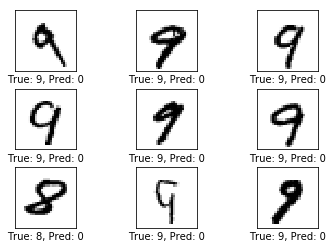

Confusion Matrix:
[[ 978    0    0    0    0    0    2    0    0    0]
 [   0 1132    1    1    0    0    0    1    0    0]
 [   1    1 1028    1    0    0    0    1    0    0]
 [   1    0    0 1006    0    2    0    1    0    0]
 [   6    0    0    0  973    0    1    2    0    0]
 [   5    0    0    8    0  878    1    0    0    0]
 [   6    2    0    1    0    3  946    0    0    0]
 [   3    1    6    0    0    0    0 1018    0    0]
 [ 955    0   10    5    0    2    0    2    0    0]
 [ 997    1    1    0    3    3    1    3    0    0]]


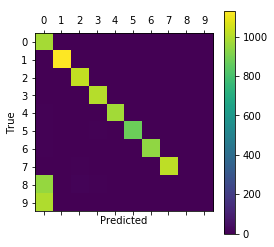

In [40]:
print_test_accuracy(show_example_errors=True,
                   show_confusion_matrix=True)

### Optimizing the input Images
##### Helper-function for geting the names of convolutional layers

In [41]:
def get_conv_layer_names():
    graph = tf.get_default_graph()
    
    #Create a list of names for the operations in the graph
    #for the Inception model where the operator-type is 'Conv2D'
    names = [op.name for op in graph.get_operations() if op.type == 'Conv2D']
    
    return names

In [42]:
conv_names = get_conv_layer_names()

In [43]:
conv_names

['layer_conv1/Conv2D', 'layer_conv2/Conv2D']

### Helper-function for finding the input image

In [44]:
def optimize_image(conv_id=None, feature=0,
                   num_iterations=30, show_progress=True):
    """
    Find an image that maximizes the feature
    given by the conv_id and feature number.

    Parameters:
    conv_id: Integer identifying the convolutional layer to
             maximize. It is an index into conv_names.
             If None then use the last fully-connected layer
             before the softmax output.
    feature: Index into the layer for the feature to maximize.
    num_iteration: Number of optimization iterations to perform.
    show_progress: Boolean whether to show the progress.
    """

    # Create the loss-function that must be maximized.
    if conv_id is None:
        # If we want to maximize a feature on the last layer,
        # then we use the fully-connected layer prior to the
        # softmax-classifier. The feature no. is the class-number
        # and must be an integer between 1 and 1000.
        # The loss-function is just the value of that feature.
        loss = tf.reduce_mean(logits[:, feature])
    else:
        # If instead we want to maximize a feature of a
        # convolutional layer inside the neural network.

        # Get the name of the convolutional operator.
        conv_name = conv_names[conv_id]
        
        # Get the default TensorFlow graph.
        graph = tf.get_default_graph()
        
        # Get a reference to the tensor that is output by the
        # operator. Note that ":0" is added to the name for this.
        tensor = graph.get_tensor_by_name(conv_name + ":0")

        # The loss-function is the average of all the
        # tensor-values for the given feature. This
        # ensures that we generate the whole input image.
        # You can try and modify this so it only uses
        # a part of the tensor.
        loss = tf.reduce_mean(tensor[:,:,:,feature])

    # Get the gradient for the loss-function with regard to
    # the input image. This creates a mathematical
    # function for calculating the gradient.
    gradient = tf.gradients(loss, x_image)

    # Generate a random image of the same size as the raw input.
    # Each pixel is a small random value between 0.45 and 0.55,
    # which is the middle of the valid range between 0 and 1.
    image = 0.1 * np.random.uniform(size=img_shape) + 0.45

    # Perform a number of optimization iterations to find
    # the image that maximizes the loss-function.
    for i in range(num_iterations):
        # Reshape the array so it is a 4-rank tensor.
        img_reshaped = image[np.newaxis,:,:,np.newaxis]

        # Create a feed-dict for inputting the image to the graph.
        feed_dict = {x_image: img_reshaped}

        # Calculate the predicted class-scores,
        # as well as the gradient and the loss-value.
        pred, grad, loss_value = session.run([y_pred, gradient, loss],
                                             feed_dict=feed_dict)
        
        # Squeeze the dimensionality for the gradient-array.
        grad = np.array(grad).squeeze()

        # The gradient now tells us how much we need to change the
        # input image in order to maximize the given feature.

        # Calculate the step-size for updating the image.
        # This step-size was found to give fast convergence.
        # The addition of 1e-8 is to protect from div-by-zero.
        step_size = 1.0 / (grad.std() + 1e-8)

        # Update the image by adding the scaled gradient
        # This is called gradient ascent.
        image += step_size * grad

        # Ensure all pixel-values in the image are between 0 and 1.
        image = np.clip(image, 0.0, 1.0)

        if show_progress:
            print("Iteration:", i)

            # Convert the predicted class-scores to a one-dim array.
            pred = np.squeeze(pred)

            # The predicted class for the Inception model.
            pred_cls = np.argmax(pred)

            # The score (probability) for the predicted class.
            cls_score = pred[pred_cls]

            # Print the predicted score etc.
            msg = "Predicted class: {0}, score: {1:>7.2%}"
            print(msg.format(pred_cls, cls_score))

            # Print statistics for the gradient.
            msg = "Gradient min: {0:>9.6f}, max: {1:>9.6f}, stepsize: {2:>9.2f}"
            print(msg.format(grad.min(), grad.max(), step_size))

            # Print the loss-value.
            print("Loss:", loss_value)

            # Newline.
            print()

    return image.squeeze()

This next function finds the images that maximize the first 10 features of a layer, by calling the above function 10 times.

In [45]:
def optimize_images(conv_id=None, num_iterations=30):
    """
    Find 10 images that maximize the 10 first features in the layer
    given by the conv_id.
    
    Parameters:
    conv_id: Integer identifying the convolutional layer to
             maximize. It is an index into conv_names.
             If None then use the last layer before the softmax output.
    num_iterations: Number of optimization iterations to perform.
    """

    # Which layer are we using?
    if conv_id is None:
        print("Final fully-connected layer before softmax.")
    else:
        print("Layer:", conv_names[conv_id])

    # Initialize the array of images.
    images = []

    # For each feature do the following.
    for feature in range(0,10):
        print("Optimizing image for feature no.", feature)
        
        # Find the image that maximizes the given feature
        # for the network layer identified by conv_id (or None).
        image = optimize_image(conv_id=conv_id, feature=feature,
                               show_progress=False,
                               num_iterations=num_iterations)

        # Squeeze the dim of the array.
        image = image.squeeze()

        # Append to the list of images.
        images.append(image)

    # Convert to numpy-array so we can index all dimensions easily.
    images = np.array(images)

    # Plot the images.
    plot_images10(images=images)

### First Convolutional layer

Layer: layer_conv1/Conv2D
Optimizing image for feature no. 0
Optimizing image for feature no. 1
Optimizing image for feature no. 2
Optimizing image for feature no. 3
Optimizing image for feature no. 4
Optimizing image for feature no. 5
Optimizing image for feature no. 6
Optimizing image for feature no. 7
Optimizing image for feature no. 8
Optimizing image for feature no. 9


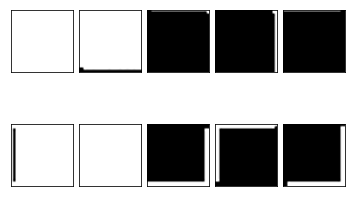

In [46]:
optimize_images(conv_id=0)

### Second Convolutional layer

Layer: layer_conv2/Conv2D
Optimizing image for feature no. 0
Optimizing image for feature no. 1
Optimizing image for feature no. 2
Optimizing image for feature no. 3
Optimizing image for feature no. 4
Optimizing image for feature no. 5
Optimizing image for feature no. 6
Optimizing image for feature no. 7
Optimizing image for feature no. 8
Optimizing image for feature no. 9


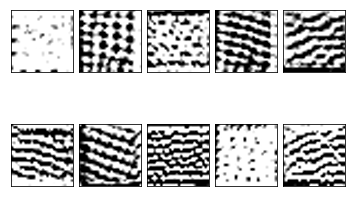

In [47]:
optimize_images(conv_id=1)

### Final output layer

In [48]:
image = optimize_image(conv_id=None, feature=2,
                      num_iterations=10, show_progress=True)

Iteration: 0
Predicted class: 6, score:  33.70%
Gradient min:  0.000000, max:  0.000000, stepsize: 100000000.00
Loss: 0.0

Iteration: 1
Predicted class: 6, score:  33.70%
Gradient min:  0.000000, max:  0.000000, stepsize: 100000000.00
Loss: 0.0

Iteration: 2
Predicted class: 6, score:  33.70%
Gradient min:  0.000000, max:  0.000000, stepsize: 100000000.00
Loss: 0.0

Iteration: 3
Predicted class: 6, score:  33.70%
Gradient min:  0.000000, max:  0.000000, stepsize: 100000000.00
Loss: 0.0

Iteration: 4
Predicted class: 6, score:  33.70%
Gradient min:  0.000000, max:  0.000000, stepsize: 100000000.00
Loss: 0.0

Iteration: 5
Predicted class: 6, score:  33.70%
Gradient min:  0.000000, max:  0.000000, stepsize: 100000000.00
Loss: 0.0

Iteration: 6
Predicted class: 6, score:  33.70%
Gradient min:  0.000000, max:  0.000000, stepsize: 100000000.00
Loss: 0.0

Iteration: 7
Predicted class: 6, score:  33.70%
Gradient min:  0.000000, max:  0.000000, stepsize: 100000000.00
Loss: 0.0

Iteration: 8
Pre

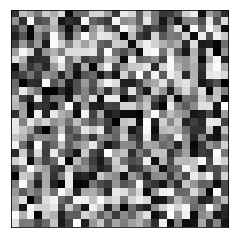

In [49]:
plot_image(image)

Final fully-connected layer before softmax.
Optimizing image for feature no. 0
Optimizing image for feature no. 1
Optimizing image for feature no. 2
Optimizing image for feature no. 3
Optimizing image for feature no. 4
Optimizing image for feature no. 5
Optimizing image for feature no. 6
Optimizing image for feature no. 7
Optimizing image for feature no. 8
Optimizing image for feature no. 9


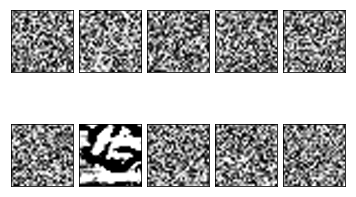

In [50]:
optimize_images(conv_id=None)

In [51]:
session.close()